In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import enchant
import cloudpickle
%matplotlib inline

In [2]:
y_t = cloudpickle.load(open("pickles/forum_labels.pkl", "rb" ) )

In [3]:
disease_db = cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

In [2]:
tfidf_t = cloudpickle.load(open("pickles/forum_vecrepresent.pkl", "rb" ) )
forum_vectorizer = cloudpickle.load(open("pickles/forum_vectorizer.pkl", "rb" ) )

In [5]:
print tfidf_t.shape
print y_t.shape

(63846, 836)
(63846, 72)


Just randomly assigning some pregnancies to be 0 cause they are super over represented

In [6]:
dropi = [i for i,d in enumerate(disease_db) if d['name']=='pregnancy'][0]
tozero = y[:,dropi]==1
y[tozero,dropi]=1*(np.random.random((tozero.sum(),))<0.1)

In [7]:
print y[:,dropi].sum()
print tfidf.shape
print y.shape

1450.0
(23796, 836)
(23796, 72)


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.1, random_state=42)

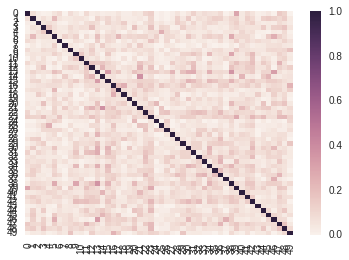

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
sns.heatmap(cosine_similarity(tfidf[:50,:]))

In [91]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(tfidf_train, y_train)
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=12,max_depth=60).fit(X_train, y_train)

predicted = clf.predict_proba(X_test)

In [92]:
prob = np.array([a[:,1] for a in predicted]).T
print prob.shape
print y_test.shape

(2380, 72)
(2380, 72)


In [93]:
from sklearn.metrics import log_loss
print log_loss(y_test,prob)

3.68012191479


In [94]:
from sklearn.metrics import accuracy_score
print accuracy_score(clf.predict(X_test), y_test)

0.438235294118


In [95]:
with open("pickles/forum_classifier.pkl", 'wb') as handle:
    cloudpickle.dump(clf, handle)

# Now test this guy on new text

In [102]:
text = "My stomach hurts"
vec = forum_vectorizer.transform([text])
predicted = clf.predict_proba(vec)
prob = np.array([a[:,1] for a in predicted]).T.tolist()[0]

In [103]:
sorted([(disease_db[i]['name'],p) for i,p in enumerate(prob)],key=lambda x: -x[1])[:10]

[('pid', 0.1298086293363895),
 ('pelvic inflammatory disease', 0.10521324397333513),
 ('anxiety', 0.05752545488065825),
 ('gas', 0.05012824637550601),
 ('cancer', 0.035054079495735364),
 ('anemia', 0.03290683899435971),
 ('mucus', 0.026192517872400203),
 ('pregnancy', 0.02552289495522043),
 ('inflammatory bowel disease', 0.02255728540389136),
 ('diabetes', 0.022126285934459904)]

In [17]:
vv=forum_vectorizer.transform(["I have a skin irritation on the side\
of my private part. Initially it looked like a mosquito bite bite \
(a small bumb). Itt now seems to be redish and circular. \
I have tried lamisil cream but t still persists. I have not \
been intimate for more than two years. Is this a STI and what \
over the counter medication can I use to cure this? This irritation \
has been there for more than two weeks. I do not have any pain when urinating.\
It is summer where I am now and hot."])

In [14]:
np.nonzero(np.array(vv.todense()))[1].tolist()

[398, 432, 444, 445, 652, 656]

In [18]:
np.array(forum_vectorizer.get_feature_names())[np.nonzero(np.array(vv.todense()))[1].tolist()]

array([u'ani', u'cream', u'cure', u'ha', u'hot', u'irrit', u'like',
       u'look', u'look like', u'medic', u'pain', u'skin', u'small', u'thi',
       u'tri', u'use', u'week', u'year'], 
      dtype='<U18')